# Tutorial 16: List Comprehensions and Map/Reduce

## PHYS 2600, Spring 2019

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import functools

In [2]:
# Initialization cell - run me

def setup_point_plot():
    plt.figure(figsize=(6,6))
    plt.axvline(0)
    plt.axhline(0)

    plt.xlabel('x')
    plt.ylabel('y')
    
    th = np.linspace(0, 2*np.pi, 50)
    plt.plot(np.cos(th), np.sin(th), color='r', linestyle='--')
    
def plot_cartesian(points):
    plt.scatter(np.array(points)[:,0], np.array(points)[:,1], color='k')    

def plot_polar(points):
    r = np.array(points)[:,0]
    phi = np.array(points)[:,1]
    
    plt.scatter(r * np.cos(phi), r * np.sin(phi), color='limegreen', marker='x')

For this entire tutorial, you'll be writing in declarative style only - which means __no `for` or `while` loops allowed!__  (The `for` in a list comprehension is okay, of course.)

## T16.1 - Introduction to map/reduce

Let's start with the example from lecture that we didn't write any code for.  We have a set of Cartesian points in two dimensions, stored as a list of 20 length-2 lists.

__Run the cell below__ to load the list `pts` and plot the points.  _(Make sure you ran the initialization cell above first.)_

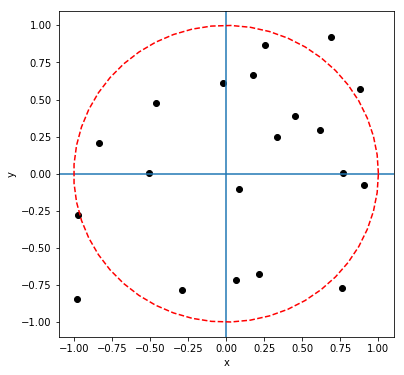

In [3]:
pts = [[ 0.76135076, -0.77039654],
       [ 0.08163647, -0.10009183],
       [ 0.68868096,  0.91933837],
       [ 0.45523078,  0.38878166],
       [ 0.06226641, -0.71717507],
       [ 0.8791983 ,  0.56849504],
       [ 0.6159388 ,  0.2962535 ],
       [ 0.9074213 , -0.07573378],
       [ 0.76437917,  0.00316327],
       [-0.28816238, -0.78560483],
       [ 0.2146455 , -0.67439846],
       [ 0.17569189,  0.66686065],
       [-0.0185947 ,  0.6090448 ],
       [ 0.25339971,  0.86800028],
       [-0.45825946,  0.47931239],
       [ 0.33481938,  0.24627549],
       [-0.50618177,  0.00622503],
       [-0.83287995,  0.20805958],
       [-0.97785883, -0.84571404],
       [-0.968929  , -0.27595801]]


setup_point_plot()    
plot_cartesian(pts)

Here's the table of syntax examples from the end of lecture for your reference below.  Here `F` is a function, `L` is a sequence (list, tuple, array, etc.), and `a` is an array.

| function | comprehension | NumPy |
|----------|---------------|-------|
| `map(F, L)` | `[ F(x) for x in L ]` | `F(a)` |
| `filter(test, L)` | `[ x for x in L if test(x) ]` | `a[test(a)]`
| `map(F, filter(test, L))` | `[ F(x) for x in L if test(x) ]` | `F(a[test(a)])`
| `sum(map(F, L)` | `sum([ F(x) for x in L ])` | `np.sum(F(a))` |

For this tutorial only, __don't use the NumPy versions of these operations:__ we already know how to use NumPy, this tutorial is meant to get you used to the other keywords.

### Part A

Let's start with mapping.  Using the `map()` function, __create a new list__ `polar_pts` which consists of two-element lists with polar coordinates $(r, \phi)$.  As a reminder, the coordinate conversion is given by

$$
r = \sqrt{x^2 + y^2} \\
\phi = \tan^{-1} (y/x)
$$

where the latter is implemented in a quadrant-aware way by the function `np.arctan2(y,x)`.

_(Hint: declarative programming is easiest if you break things apart!  Start by creating the function_ `to_polar` _which will take one Cartesian point and return one polar point.  Then use `map()`.)_

_(Another hint: don't forget that `map()` doesn't return a list!  Use `list()` on the result of `map()` to get one.)_

In [4]:
def to_polar(cart_point):
    """
    Maps a single point (x,y) to polar coordaintes (r, phi).
    """

    ### BEGIN SOLUTION
    x, y = cart_point
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y,x)
    
    return (r, phi)

polar_pts = list(map(to_polar, pts))
print(polar_pts)
### END SOLUTION
    

[(1.0831277895966613, -0.791303624986407), (0.12916225325848804, -0.886605868419633), (1.1486794606071697, 0.92786827084934), (0.598653691387403, 0.7068302038570703), (0.7198730352248187, -1.4841917287271453), (1.0469843653214175, 0.5739856944049394), (0.6834813396192247, 0.4483151785381107), (0.9105762028115925, -0.0832674595745994), (0.7643857153342034, 0.004138328288272639), (0.8367870136221005, -1.9223614842616807), (0.7077329817951271, -1.2626571417436907), (0.6896163909958889, 1.3131889958172023), (0.6093285905610618, 1.601317768936532), (0.9042322152567682, 1.2867548881964999), (0.6631305300519678, 2.333743525322485), (0.4156388266251416, 0.6341870319421661), (0.5062200463028246, 3.129295260497921), (0.858474111398695, 2.8967952634120815), (1.292841880843164, -2.428532818143707), (1.0074602872193823, -2.8641317697542634)]


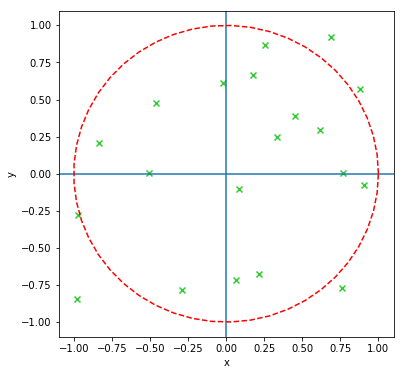

In [5]:
# Run me to test - polar points should match locations in the plot above!
setup_point_plot()
plot_polar(polar_pts)

### Part B

Next, let's try a filter.  Using the `filter()` function, __create a new list__ `far_pts` which contains only those __points which are further than distance 1__ from the origin.  (The points in `far_pts` should be _in Cartesian coordinates_, not polar where this is a little easier.)

_(Hint: once again, don't forget that `filter()` doesn't return a list - to get a list, use the `list()` method.)_

In [6]:
def is_far(point):
    """
    Returns True if a point is further than distance 1 from the origin,
    and False otherwise.
    """
    ### BEGIN SOLUTION
    x, y = point
    r = np.sqrt(x**2 + y**2)
    
    return r > 1

far_pts = list(filter(is_far, pts))
far_pts
### END SOLUTION
    

[[0.76135076, -0.77039654],
 [0.68868096, 0.91933837],
 [0.8791983, 0.56849504],
 [-0.97785883, -0.84571404],
 [-0.968929, -0.27595801]]

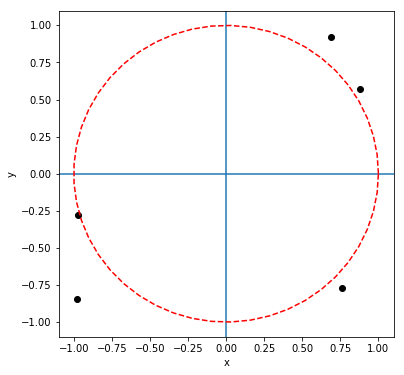

In [7]:
# Run me to test - you should only see the points outside the circle!

setup_point_plot()
plot_cartesian(far_pts)

### Part C

Finally, let's do a reduction.  Treating the points as two-vectors, __find the vector sum of all the vectors__ in `pts` using `functools.reduce()`.

Remember that `reduce()` requires a function that acts on _two_ elements of the list, and returns _one_ element of the same form.  (Our vector-sum qualifies, since summing two vectors gives one vector.)

In [8]:
def vec_sum(pt1, pt2):
    """
    Given two vectors in the form of tuples (x,y),
    returns the vector sum (also as a 2-tuple.)
    """
    ### BEGIN SOLUTION
    x1, y1 = pt1
    x2, y2 = pt2
    
    return (x1+x2, y1+y2)

functools.reduce(vec_sum, pts)
### END SOLUTION
    

(2.1437933399999993, 1.0147374999999998)

If you do the reduction correctly, the vector you find should be about $(x, y) = (2.15, 1.01)$.

## T16.2 - Fun with comprehensions

Now let's turn to using the shorthand syntax of comprehensions, which (as we've seen) can accomplish many of the same tasks as `map()` and `filter()`.

### Part A

Using a list comprehension, make a list of __powers of 1/2 from 0 to 10__, i.e. the 0th power through the 10th power including both ends.  (The last entry will be $1/2^{10} = 1/1024 \approx 0.00977.$)

## END OF SOLUTIONS - the rest of this tutorial ended up on homework 7.

In [ ]:
## YOUR CODE HERE


Now, again using a list comprehension, find the __sum of the square roots of all even integers from 1 to 30__.

_(Hint: you'll need the `for...in...if...` notation to include the filter for even integers here.  The answer should be about 57.2.)_

In [ ]:
## YOUR CODE HERE


One more simple math question for a list comprehension: __what is the product of the first five powers of 3__ (i.e. the product of 3, 9, 27, 81, and 243)?

_(Hint: this isn't a sum, so you'll need to make your own reduction with `functools.reduce()`.  You can use a `lambda` to do it all in one line, but using `def` to set up for the reduction first is fine too.)_

In [ ]:
## YOUR CODE HERE


### Part B

Below is a function called `grade_to_GP`, which converts from letter grades to the equivalent grade-point score using the matching pair of lists `letter_grades` and `numeric_grades`.  Following that, I've given a list of letter grades - a distribution for some class in one semester at CU, perhaps.

__Use a list comprehension and the `sum()` function__ to convert `some_letter_grades` into a numerical grade-point averge.

In [ ]:
letter_grades = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
numeric_grades = [4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]

def grade_to_GP(g):
    grade_i = letter_grades.index(g)
    return numeric_grades[grade_i]

some_letter_grades = [
    'A', 'A-', 'C', 'B+', 'B+',
    'A', 'A', 'A', 'A', 'A',
    'F', 'A', 'A-', 'C', 'B-',
    'B-', 'A-', 'B-', 'C+', 'B',
    'D', 'B', 'C-', 'C+', 'B+',
]

In [ ]:
## YOUR CODE HERE


Now consider instead the list `some_student_grades` below, which is a list of lists, each sub-list consisting of 5 letter grades.  (Each list could be the grades of a student for a single semester at CU.)  __Use a list comprehension to find a list of grade-point averages__ for each student, and save it to the variable `student_GPAs` for testing. 

_(Hint: you can use a list comprehension inside of another list comprehension, which can be a nice way to deal with nested lists.)_

In [ ]:
some_student_grades = [
    ['B', 'B+', 'C-', 'B+', 'B+'],
    ['A', 'A', 'A-', 'B', 'B+'],
    ['C', 'A', 'A-', 'B-', 'C+'],
    ['A-', 'A-', 'B+', 'A', 'F'],
    ['D', 'B-', 'C', 'C+', 'B-'],
    ['B+', 'A-', 'B', 'C+', 'B+'],
]

In [ ]:
## YOUR CODE HERE


In [ ]:
import numpy.testing as npt

print(student_GPAs)
npt.assert_allclose(student_GPAs, [2.92, 3.60, 2.94, 2.94, 2.14, 3.12], atol=1e-2)

### Part C

The list in the next cell contains tuples of measurements `(P, T)` of pressure and temperature for 10 moles of nitrogen gas in an expandable box.  We'll assume the ideal gas law

\\[
PV = nRT
\\]

with the gas constant $R = 8.314$ J / (mol K), and remember that one kilopascal (kPa) is equal to 1000 $J/m^3$.

Using a list comprehension, __create a list of volumes__ for each `(P, T)` tuple.

In [ ]:
gas_meas = [  # (P, T) in units (kPa, K)
    (130, 300),
    (110, 340),
    (265, 550),
    (80, 460),
]
gas_meas

In [ ]:
## YOUR CODE HERE


### Part D (optional challenge)

Now a slightly different experiment.  We hold our box at room temperature $T = 300$ K and atmospheric pressure $P = 80$ kPa, and introduce a mixture of two gases, nitrogen (28 g/mol) and carbon dioxide (44 g/mol).  Based on the weight of the gases we add, we'd like to know the final volume of our expandable container.

__Implement the function `vol_from_weights(m_N2, m_CO2)` below__, which should take the weights (in grams) of each of the two gases mixed in to the container and return the volume.  (With two species of gas, we still use the ideal gas law, just adding the number of moles from each gas to get the total $n$.)

Then __use a list comprehension__ to get a list of volumes corresponding to each pair of mass values in `masses_N2` and `masses_CO2`.  (The masses represent 8 experiments total, for example the first experiment used a mixture of `masses_N2[0]` nitrogen and `masses_CO2[0]` carbon dioxide.)

Oh, one more thing: we had a measurement error occur when one of our friends came by and leaned on the apparatus, throwing off the weight measurements badly.  __Include a filter to remove any experiments where the weight of either gas is over 1 kg.__

In [ ]:
masses_N2 = [0.30989415, 4.30978635, 0.13382561, 0.1652629 , 0.01619259,
       0.2213031 , 0.12360093, 0.06485605]
masses_CO2 = [0.15333776, 0.0367193 , 0.14671116, 0.16766352, 0.11070479,
       0.20085344, 0.21611008, 33.03265966]

In [ ]:
## YOUR CODE HERE
